In [1]:
import scanpy as sc
import harmonypy as hm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Load data

In [2]:
adata = sc.read_h5ad("../data/adata_merged.h5ad")
adata

AnnData object with n_obs × n_vars = 3261 × 22425
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    layers: 'counts'

# Preprocessing & batch correction

In [3]:
# 데이터 전처리 (필요시 실행)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, batch_key='sample')
# adata = adata[:, adata.var['highly_variable']]

In [5]:
# PCA 수행
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='full')

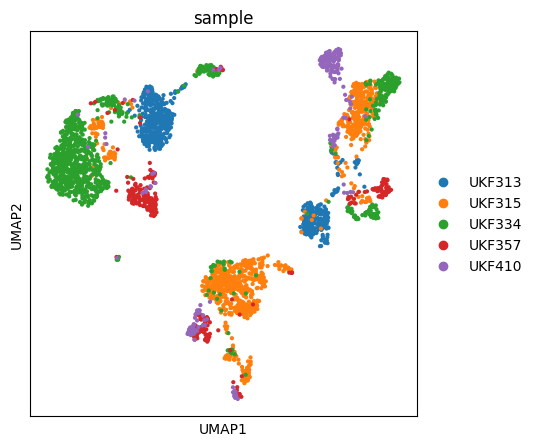

In [6]:
# UMAP 시각화
sc.pp.neighbors(adata)
sc.tl.umap(adata)
fig = sc.pl.umap(adata, color='sample', return_fig=True)
fig.set_size_inches(5, 5)
plt.show()

2024-11-25 00:13:35,217 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-11-25 00:13:36,705 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-11-25 00:13:36,724 - harmonypy - INFO - Iteration 1 of 30
2024-11-25 00:13:37,073 - harmonypy - INFO - Iteration 2 of 30
2024-11-25 00:13:37,367 - harmonypy - INFO - Iteration 3 of 30
2024-11-25 00:13:37,665 - harmonypy - INFO - Iteration 4 of 30
2024-11-25 00:13:37,962 - harmonypy - INFO - Iteration 5 of 30
2024-11-25 00:13:38,260 - harmonypy - INFO - Iteration 6 of 30
2024-11-25 00:13:38,482 - harmonypy - INFO - Iteration 7 of 30
2024-11-25 00:13:38,670 - harmonypy - INFO - Iteration 8 of 30
2024-11-25 00:13:38,803 - harmonypy - INFO - Iteration 9 of 30
2024-11-25 00:13:38,962 - harmonypy - INFO - Iteration 10 of 30
2024-11-25 00:13:39,078 - harmonypy - INFO - Iteration 11 of 30
2024-11-25 00:13:39,188 - harmonypy - INFO - Iteration 12 of 30
2024-11-25 00:13:39,308 - harmonypy - INFO - Iteration 13 of

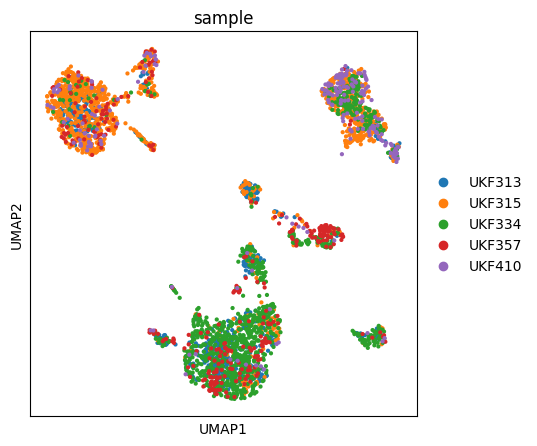

In [7]:
# Harmony로 배치 보정
ho = hm.run_harmony(adata.obsm['X_pca'], adata.obs, 'sample', max_iter_harmony = 30)
adata.obsm['X_pca_harmony'] = ho.Z_corr.T  # Harmony 보정된 PCA 결과를 저장

# UMAP 시각화
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)
fig = sc.pl.umap(adata, color='sample', return_fig=True)
fig.set_size_inches(5, 5)
plt.show()

# Clustering

/tmp/ipykernel_32175/1460678021.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=1)


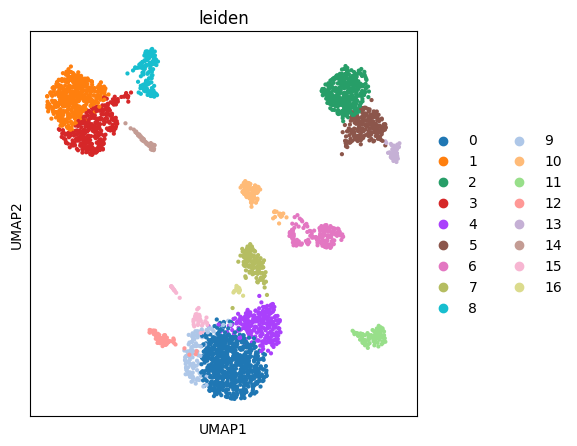

In [8]:
# leiden clustering
sc.tl.leiden(adata, resolution=1)
fig = sc.pl.umap(adata, color='leiden', return_fig=True)
fig.set_size_inches(5, 5)
plt.show()

# InferCNVpy

In [8]:
adata

AnnData object with n_obs × n_vars = 3261 × 22425
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

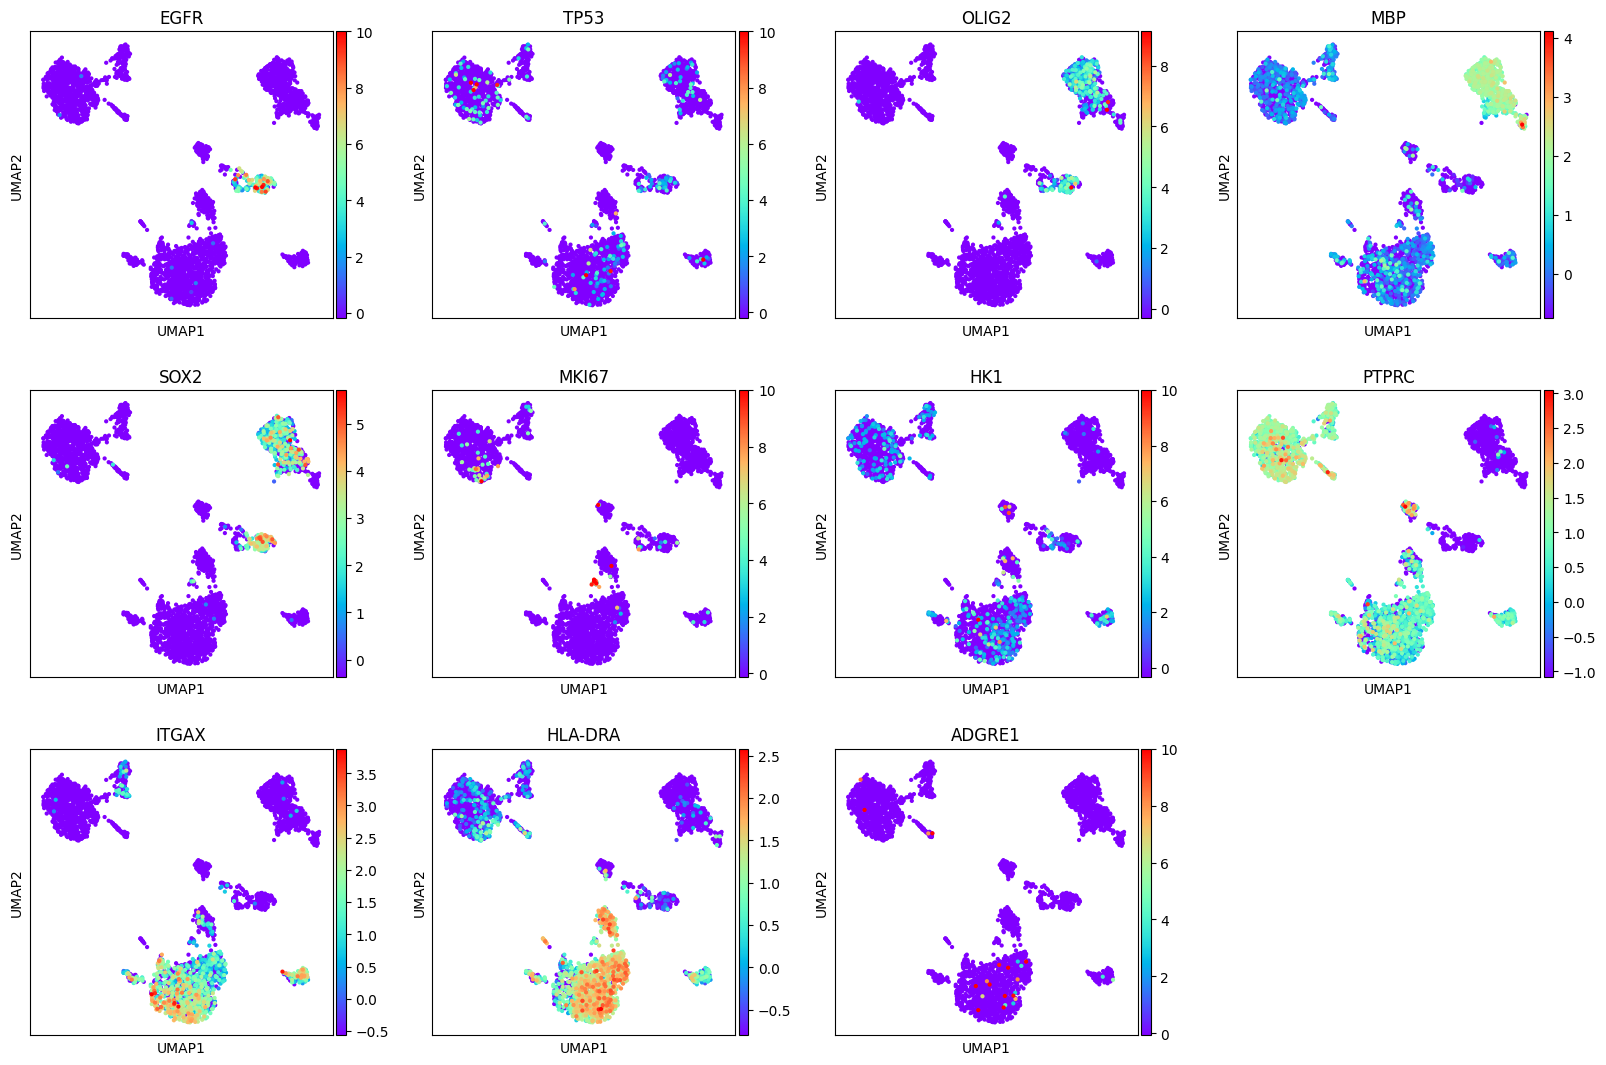

In [21]:
rcParams['figure.figsize'] = 4, 4
sc.pl.umap(
    adata,
    # color = ['leiden', 'OLIG2', 'PDGFRA', 'SOX10', 'MBP', 'MOG', 'PLP1', 'CNP', 'MAP2', 'TUBB3', 'RBFOX3', 'FN1', 'S100A4'],
    # color = ['leiden', 'P2RY12', 'TMEM119', 'CX3CR1', 'HLA-DRA', 'C1QA', 'EGFR', 'CCR2', 'SYN1'],
    # color = ['leiden', 'GFAP', 'MAP2', 'SYN1', 'PTPRC', 'ITGAX', 'CCR7', 'HLA-DRA', 'ITGAM'],
    # color = ['leiden', 'CXCR2', 'S100A8', 'S100A9'],
    # color = ['leiden', 'GFAP', 'S100B', 'ALDH1L1'],
    # color = ['leiden', 'CD3E', 'CD4', 'CD8A', 'FOXP3', 'NCR1', 'TRDC', 'CD19', 'PTPRC'],
    color = ['EGFR', 'TP53', 'OLIG2', 'MBP', 'SOX2', 'MKI67', 'HK1', 'PTPRC', 'ITGAX', 'HLA-DRA', 'ADGRE1'],
    # color = ['leiden', 'SNAP25', 'SYP'],
    # frameon = False,
    legend_loc = 'on data',
    color_map = 'rainbow',
)

/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/jsw/jswenv/lib/python3.10/site-packages/scan

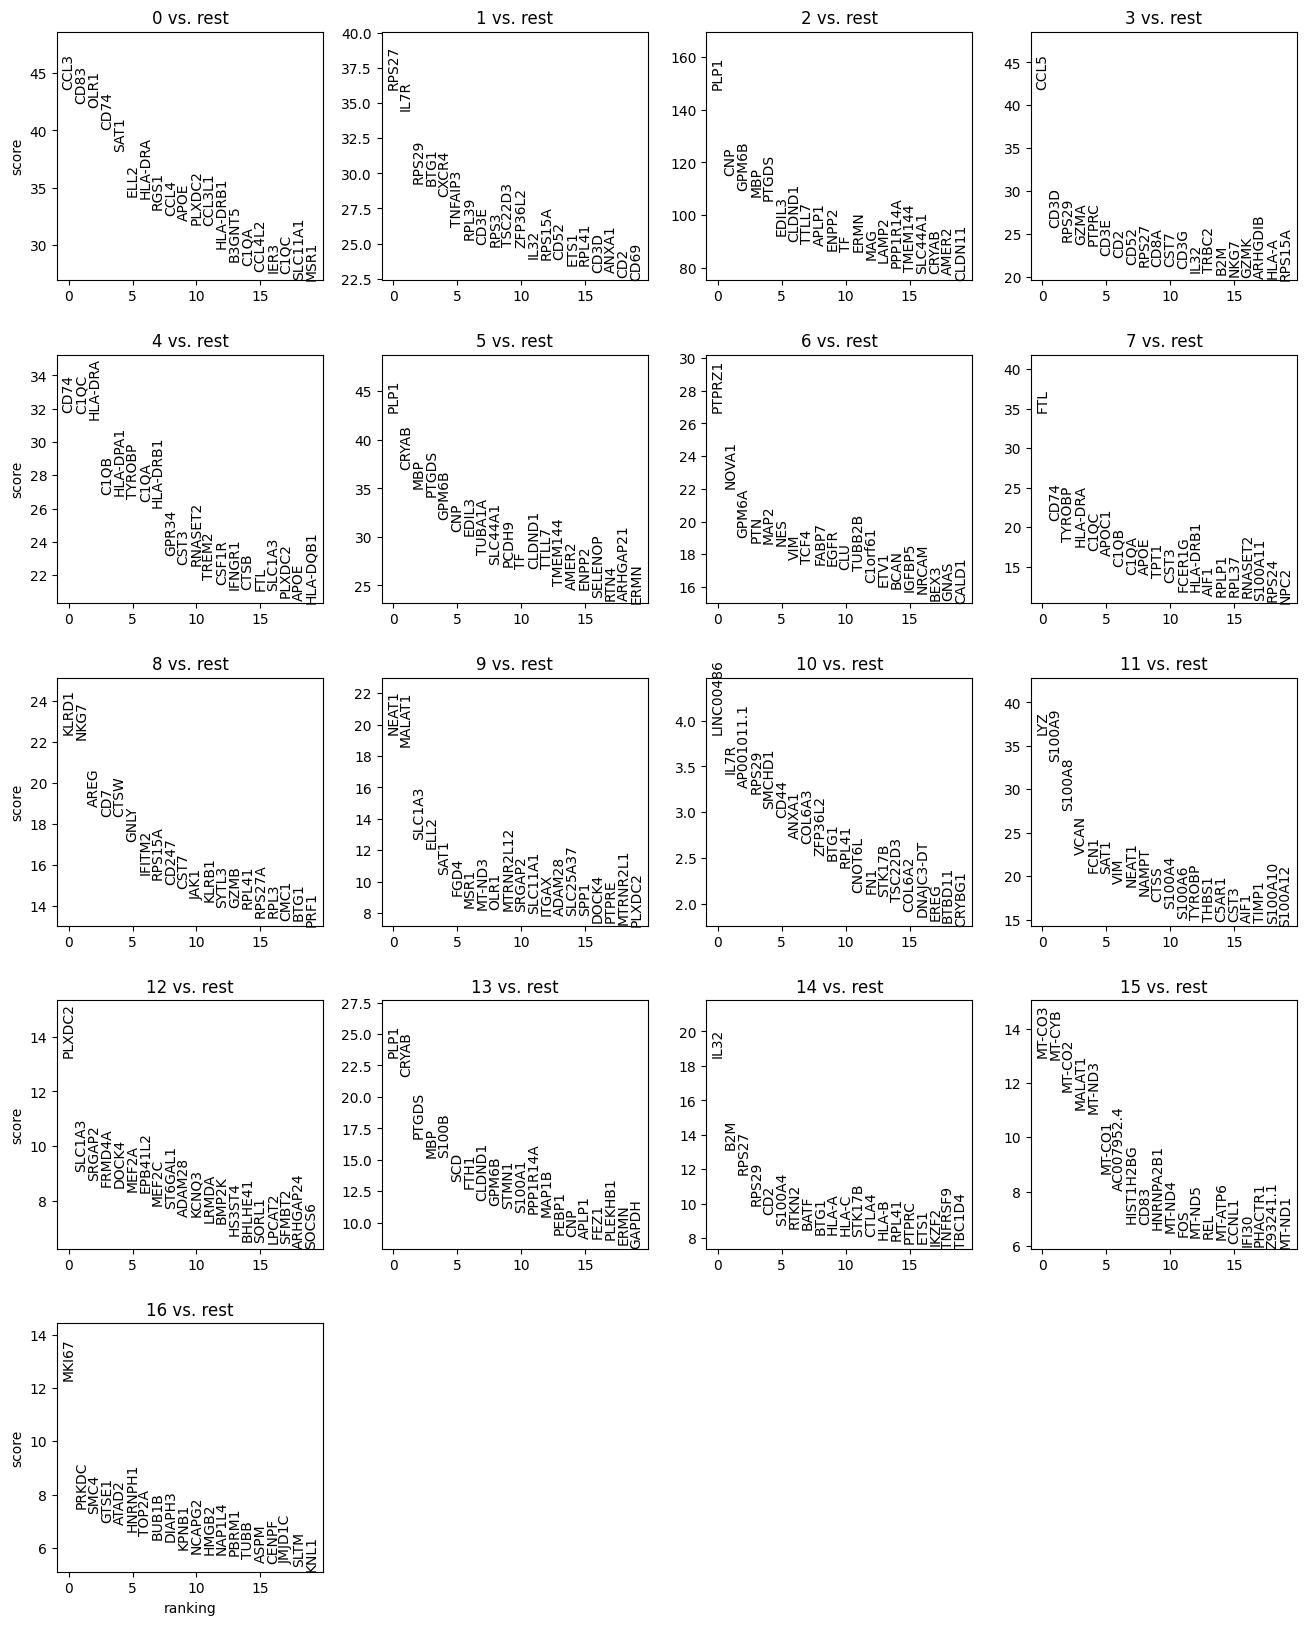

In [23]:
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes = 20, sharey = False, fontsize = 10)


In [ ]:
adata.obs['tumor_cell'] = 'tumor'
adata.obs.loc[adata.obs['leiden'] == '1', 'tumor_cell'] = 'normal'
adata.obs.loc[adata.obs['leiden'] == '3', 'tumor_cell'] = 'normal'
sc.pl.umap(
    adata,
    color = ['tumor_cell'],
)

## adata.var에 chromosome, start, end column 추가

In [ ]:
adata.var.index

In [ ]:
import pandas as pd

# GTF 파일 경로
gtf_file = '../../Database/gencode.v44.annotation.gtf'

# 파일 로드
gtf = pd.read_csv(
    gtf_file, sep = '\t', comment = '#', header = None,
    names = ['chromosome', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
)

# gene feature만 선택
gtf = gtf[gtf['feature'] == 'gene']

# attribute column에서 gene_id 및 gene_name 추출
gtf['gene_id'] = gtf['attribute'].str.extract('gene_id "([^"]+)"')
gtf['gene_name'] = gtf['attribute'].str.extract('gene_name "([^"]+)"')

# 필요한 열 선택
gtf = gtf[['chromosome', 'start', 'end', 'gene_name']]

# gene_name을 인덱스로 설정
gtf.set_index('gene_name', inplace = True)

# gtf에서 중복된 index 제거
duplicates = gtf.index[gtf.index.duplicated()].unique()
gtf = gtf[~gtf.index.duplicated(keep = 'first')]

# 공통된 gene만 선택
common_genes = gtf.index.intersection(adata.var.index)
filtered_gtf = gtf.loc[common_genes]
adata = adata[:, common_genes]

print(len(adata.var.index))
print(len(filtered_gtf.index))

In [ ]:
# gtf 정보와 adata.var 병합
adata.var = pd.merge(filtered_gtf, adata.var, how = 'inner', left_index = True, right_index = True)

# 필요한 열 확인
# adata.var.head()

In [ ]:
import infercnvpy as cnv

cnv.tl.infercnv(
    adata = adata,
    reference_key = 'tumor_cell',
    reference_cat = 'normal',
    window_size = 100,
    n_jobs = 24
)

In [ ]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)
cnv.tl.leiden(adata)

In [ ]:
cnv.pl.chromosome_heatmap(adata, groupby = 'cnv_leiden', dendrogram = True)

In [ ]:
cnv.pl.chromosome_heatmap(adata, groupby = 'leiden', dendrogram = True)

In [ ]:
cnv.tl.cnv_score(adata)

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={"wspace": 0.5})
sc.pl.umap(adata, color="leiden", ax=ax1, show=False, legend_loc = 'on data')
sc.pl.umap(adata, color="cnv_score", ax=ax2, show=False, color_map = 'coolwarm')

In [ ]:
# plot violin plot by cnv_score
fig, ax = plt.subplots(figsize = (16, 4))

sc.pl.violin(
    adata,
    keys = ['cnv_score'],
    groupby = 'leiden',
    stripplot = False,
    # jitter = 0.4,
    # size = 0.3,
    # layer = 'scvi_normalized', use_raw = False,
    ax = ax,
)

# cell type annotation

In [45]:
# cell_type = {
#     '0': 'Mo/Mp',
#     '1': 'CD4',
#     '2': 'Oligodendrocytes',
#     '3': 'CD8',
#     '4': 'Mo/Mp',
#     '5': 'Oligodendrocytes',
#     '6': 'Mo/Mp',
#     '7': 'Malignant',
#     '8': 'ILC/gdT',
#     '9': 'Mo/Mp',
#     '10': 'Etc',
#     '11': 'DC',
#     '12': 'Mo/Mp',
#     '13': 'Oligodendrocytes',
#     '14': 'Treg',
#     '15': 'Mo/Mp',
#     '16': 'B',
# }

cell_type = {
    '0': 'MG/Mp',
    '1': 'CD4',
    '2': 'Oligodendrocytes',
    '3': 'CD8',
    '4': 'MG/Mp',
    '5': 'Oligodendrocytes',
    '6': 'Malignant',
    '7': 'MG/Mp',
    '8': 'ILC/gdT',
    '9': 'MG/Mp',
    '10': 'etc.',
    '11': 'Neutrophils',
    '12': 'DC',
    '13': 'Oligodendrocytes',
    '14': 'Treg',
    '15': 'MG/Mp',
    '16': 'MG/Mp',
}

In [63]:
# Assigning cell types
# adata obs에 cell_type column 추가
adata.obs['cell_type'] = adata.obs.leiden.map(cell_type)
adata.obs.head(5)

,sample,n_genes,n_genes_by_counts,total_counts,pct_counts_mito,pct_counts_ribo,leiden,cell_type
AAACGAAAGAAGCGGG-1,UKF313,225,225,305.0,0.983607,15.737705,1,CD4
AAACGAAGTTGTCAGT-1,UKF313,467,467,779.0,2.567394,6.546855,0,MG/Mp
AAAGAACGTACCTTCC-1,UKF313,316,316,479.0,3.131524,0.835073,12,DC
AAAGGGCAGGAACGCT-1,UKF313,232,232,308.0,4.870130,1.948052,0,MG/Mp
AAAGGTACAATCTGCA-1,UKF313,412,412,658.0,3.799392,6.079028,0,MG/Mp


In [ ]:
# # Monocytic cells 중 P2RY12 발현이 0 초과인 cell들을 Microglia로 변경
# monocytic_cells = adata.obs['cell_type'] == 'Mo/Mp'
# p2ry12_positive = adata[:, 'TMEM119'].to_df().iloc[:, 0] > 0

# # adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Microglia'])
# adata.obs.loc[monocytic_cells & p2ry12_positive, 'cell_type'] = 'Microglia'

In [ ]:
# # 모든 cell 중 cnv_score가 0.05 이상인 cell들을 Malignant로 변경
# Malignant_cells = adata.obs['cnv_score'] > 0.05

# # adata.obs['cell_type'] = adata.obs['cell_type'].cat.add_categories(['Microglia'])
# adata.obs.loc[Malignant_cells, 'cell_type'] = 'Malignant'

In [64]:
# https://colorswall.com/palette/68
colors = ['#f44336', '#9c27b0', '#3f51b5', '#2196f3', '#009688', '#4caf50', '#ffc107', '#ff9800', '#795548', '#9e9e9e', '#607d8b']
# colors = colors[::-1]
adata.uns['cell_type_colors'] = colors

In [65]:
import pandas as pd

desired_order = ['Malignant', 'MG/Mp', 'ILC/gdT', 'CD4', 'Oligodendrocytes', 'Treg' ,'CD8', 'DC', 'etc.', 'Neutrophils']
adata.obs['cell_type'] = pd.Categorical(
    values = adata.obs.cell_type, categories = desired_order, ordered = True
)

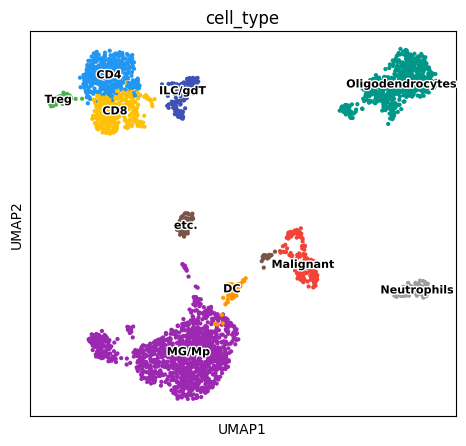

In [66]:
rcParams['figure.figsize'] = (5.5, 5)
sc.pl.umap( 
    adata,
    color = ['cell_type'],
    # frameon = False,
    legend_loc = 'on data',
    legend_fontsize = 8,
    legend_fontoutline = 2,
    # palette = sc.pl.palettes.vega_10
    # color_map = 'bwr',
    # groups = ['Microglia']
)

In [ ]:
marker_genes_dict = {
    'Malignant': ['EGFR'],
    'Mo/Mp': ['HLA-DRA', 'C1QA'],
    'Microglia': ['P2RY12', 'TMEM119'],
    'CD4': ['CD4'],
    'CD8': ['CD8A'],
    'Treg': ['FOXP3'],
    'ILC/gdT': ['NCR1', 'TRDC'],
    'Oligodendrocyte': ['MBP', 'MAG'],
    'B': ['CD19'],
    'DC': ['ITGAX'],
    'Etc': ['ITGAX']
}

In [ ]:
desired_order = ['Malignant', 'Mo/Mp', 'Microglia', 'CD4', 'CD8','Treg', 'ILC/gdT', 'Oligodendrocytes', 'B','DC', 'Etc']
adata.obs['cell_type'] = pd.Categorical(
    values = adata.obs.cell_type, categories = desired_order, ordered = True
)

# sc.tl.dendrogram(adata, groupby = 'cell_type')    # dot plot 한번 그린 후 cell type annotation 바꾸면 이거 돌려줘야 함

# excluded_cell_types = ['Etc']
# temp_adata_subset = adata[~adata.obs['cell_type'].isin(excluded_cell_types), :]
sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby = 'cell_type',
    # dendrogram = True,
    # var_group_rotation = 45,
    cmap = 'Blues',
)
# del temp_adata_subset, excluded_cell_types

# Save

In [ ]:
adata

In [67]:
adata.write_h5ad('../data/adata_annotated.h5ad')